### Evaluation Metrics

Aim:-

1.  The main goal of this project is to implement Logistic Regression on the Customer Churn dataset and evaluate the performance of the model using evaluation metrics.

### Steps used in this Algorithm:-

1. Import all the necessary libraries

2. Create the  sample dataset

3. Perform the data exploration

4. Do the data preprocessing

5. Split the data into independent and dependent features

6. Split the independent and dependent features into training and testing data

7. Perform the Feature Scaling on the inputs to make them in one range

8. Perform Model Training using Logistic Regression

9. Perform the predictions on the test data

10. Perform the Evaluation Metrics  so as to estimate the performance on the model

11. Plot the ROC Curve

### Step 1:  Import all the necessary libraries

In [772]:
import  numpy              as  np
import  pandas             as  pd
import  matplotlib.pyplot  as plt
import  seaborn            as sns

from    sklearn.model_selection  import train_test_split
from    sklearn.preprocessing    import StandardScaler
from    sklearn.linear_model     import LogisticRegression
from    sklearn.metrics          import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, recall_score

### Step 2: Create the  sample dataset

In [773]:
# (Replace this with your real dataset)
data = {
    'CreditScore': [650, 720, 580, 600, 750, 800, 540, 670],
    'Age': [40, 29, 50, 45, 35, 28, 55, 42],
    'Balance': [60000, 120000, 30000, 50000, 90000, 150000, 20000, 70000],
    'Exited': [1, 0, 1, 1, 0, 0, 1, 0]   # Target
}

### Create the dataframe from this dataset

df = pd.DataFrame(data)

print(df)

   CreditScore  Age  Balance  Exited
0          650   40    60000       1
1          720   29   120000       0
2          580   50    30000       1
3          600   45    50000       1
4          750   35    90000       0
5          800   28   150000       0
6          540   55    20000       1
7          670   42    70000       0


### OBSERVATIONS:

1. The dataset contains the details of the customer leaving the bank or not.

### Step 3: Perform the data exploration

In [774]:
### Get the total length of the records in the dataset

print("Total length of the records in the dataset is:", len(df))

Total length of the records in the dataset is: 8


In [775]:
### Shape of the dataset

df.shape

(8, 4)

In [776]:
### get the top five records of the dataset

df.head()

,CreditScore,Age,Balance,Exited
0,650,40,60000,1
1,720,29,120000,0
2,580,50,30000,1
3,600,45,50000,1
4,750,35,90000,0


In [777]:
### get the bottom five records of the dataset

df.tail()

,CreditScore,Age,Balance,Exited
3,600,45,50000,1
4,750,35,90000,0
5,800,28,150000,0
6,540,55,20000,1
7,670,42,70000,0


In [778]:
### get the columns used in the dataset

df.columns

Index(['CreditScore', 'Age', 'Balance', 'Exited'], dtype='object')

In [779]:
### get the information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CreditScore  8 non-null      int64
 1   Age          8 non-null      int64
 2   Balance      8 non-null      int64
 3   Exited       8 non-null      int64
dtypes: int64(4)
memory usage: 384.0 bytes


In [780]:
### get the statistical summary about the dataset

df.describe()

,CreditScore,Age,Balance,Exited
count,8.000000,8.000000,8.000000,8.000000
mean,663.750000,40.500000,73750.000000,0.500000
std,89.272856,9.576758,44380.658593,0.534522
min,540.000000,28.000000,20000.000000,0.000000
25%,595.000000,33.500000,45000.000000,0.000000
50%,660.000000,41.000000,65000.000000,0.500000
75%,727.500000,46.250000,97500.000000,1.000000
max,800.000000,55.000000,150000.000000,1.000000


### Step 4: Do the data preprocessing

In [781]:
### Check for any NULL Values in the dataset

df.isnull().sum()

CreditScore    0
Age            0
Balance        0
Exited         0
dtype: int64

### OBSERVATIONS:

1.  There are no NULL Values in the dataset.

In [782]:
### Check for any duplicate records in the dataset

df[df.duplicated()]

,CreditScore,Age,Balance,Exited


### OBSERVATIONS:

1. There are no duplicate records in the dataset.

### Step 5: Split the data into independent and dependent features

In [783]:
X = df.drop(columns='Exited',axis=1)    ### independent features

Y = df['Exited']                        ### dependent   features

In [784]:
X

,CreditScore,Age,Balance
0,650,40,60000
1,720,29,120000
2,580,50,30000
3,600,45,50000
4,750,35,90000
5,800,28,150000
6,540,55,20000
7,670,42,70000


In [785]:
Y

0    1
1    0
2    1
3    1
4    0
5    0
6    1
7    0
Name: Exited, dtype: int64

In [786]:
Y.value_counts()

Exited
1    4
0    4
Name: count, dtype: int64

### Step 6: Split the independent and dependent features into training and testing data

In [787]:
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [788]:
X_train

,CreditScore,Age,Balance
0,650,40,60000
4,750,35,90000
2,580,50,30000
6,540,55,20000
1,720,29,120000
7,670,42,70000


In [789]:
X_test

,CreditScore,Age,Balance
5,800,28,150000
3,600,45,50000


In [790]:
print("Shape of the input training data is:", X_train.shape)

print("Shape of the input testing data is:", X_test.shape)

Shape of the input training data is: (6, 3)
Shape of the input testing data is: (2, 3)


In [791]:
Y_train

0    1
4    0
2    1
6    1
1    0
7    0
Name: Exited, dtype: int64

In [792]:
Y_test

5    0
3    1
Name: Exited, dtype: int64

In [793]:
print("Shape of the output training data is:", Y_train.shape)

print("Shape of the output testing data is:", Y_test.shape)

Shape of the output training data is: (6,)
Shape of the output testing data is: (2,)


### Step 7: Perform the Feature Scaling on the inputs to make them in one range

In [794]:
from sklearn.preprocessing import StandardScaler


### create an object for Standard Scaler

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)

X_test_scaled  = sc.transform(X_test)

In [795]:
X_train_scaled

array([[-0.02272141, -0.21056729, -0.14691063],
       [ 1.34056292, -0.78484173,  0.73455316],
       [-0.97702043,  0.93798159, -1.02837442],
       [-1.52233416,  1.51225602, -1.32219569],
       [ 0.93157762, -1.47397106,  1.61601695],
       [ 0.24993546,  0.01914248,  0.14691063]])

In [796]:
X_test_scaled

array([[ 2.02220508, -1.58882595,  2.49748075],
       [-0.70436357,  0.36370715, -0.4407319 ]])

### OBSERVATIONS:

1.  All the input eatures has been scaled in one range.

### Step 8: Perform Model Training using Logistic Regression

In [797]:
from  sklearn.linear_model import LogisticRegression

### create an object for LogisticRegression

log = LogisticRegression()

### using the object for logistic regression , train the model

log.fit(X_train_scaled, Y_train)

LogisticRegression()

### OBSERVATIONS:

1. The Logistic Regression model has been trained with the help of the training data.

### Step 9: Perform the predictions on the test data

In [798]:
Y_pred = log.predict(X_test_scaled)   ### Returns the final class label for the test data

print(Y_pred)

[0 1]


In [799]:
Y_pred_proba = log.predict_proba(X_test_scaled)  ### extracts the probability for every class

print(Y_pred_proba)

[[0.97356474 0.02643526]
 [0.2774116  0.7225884 ]]


In [800]:
Y_pred_proba_0 = log.predict_proba(X_test_scaled)[:,0]  ### extracts the probability for  class 0

print(Y_pred_proba_0)

[0.97356474 0.2774116 ]


In [801]:
Y_pred_proba = log.predict_proba(X_test_scaled)[:,1]  ### extracts the probability for  class 1

print(Y_pred_proba)

[0.02643526 0.7225884 ]


In [802]:
Y_test

5    0
3    1
Name: Exited, dtype: int64

### Step 10: Perform the Evaluation Metrics  so as to estimate the performance on the model

In [803]:
from    sklearn.metrics   import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, recall_score, precision_score

print("==================================Evaluation Metrics==============================================")

accuracy   =   accuracy_score(Y_test, Y_pred)*100.0
cm         =   confusion_matrix(Y_test, Y_pred)
cr         =   classification_report(Y_test, Y_pred)

recall     =   recall_score(Y_test,Y_pred)
precision  =   precision_score(Y_test,Y_pred)
f1         =   f1_score(Y_test,Y_pred)

roc_auc    =   roc_auc_score(Y_test, Y_pred_proba)

print(f"Accuracy  : {accuracy:.2f}")
print(f"Confusion matrix : {cm}")
print(f"Classification Report : {cr}")

print(f"Recall Score  : {recall:.2f}")
print(f"Precision Score : {precision}")
print(f"f1 Score : {f1}")

print(f"ROC AUC Score : {roc_auc}")

==================================Evaluation Metrics==============================================
Accuracy  : 100.00
Confusion matrix : [[1 0]
 [0 1]]
Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Recall Score  : 1.00
Precision Score : 1.0
f1 Score : 1.0
ROC AUC Score : 1.0


### OBSERVATIONS:

1.  ROC_AOC_Score ----------> It is the probability that the model ranks the random positive example higher than the random negative example.

### Step 11: Plot the ROC Curve

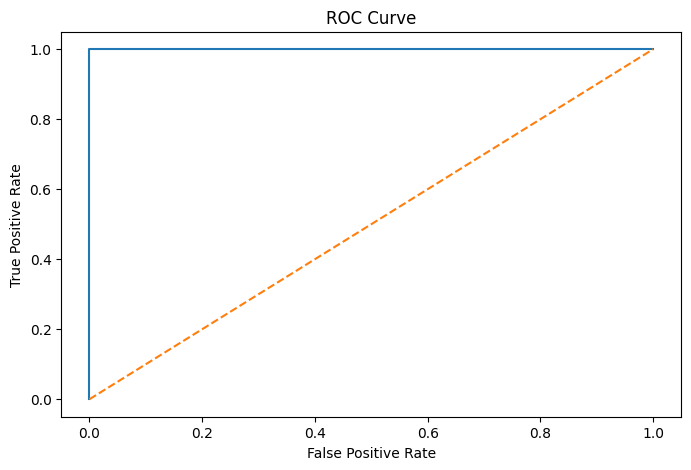

In [804]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)

plt.figure(figsize=(8,5))
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

### OBSERVATIONS:

1.  ROC curve plots TPR vs FPR across thresholds

2.  My model’s ROC curve rises vertically, indicating excellent class separation

3.  At threshold ≈ 0.72:

    (a.)   TPR = 1 (all positives detected)

    (b.)   FPR = 0 (no false positives)

4.  The model performs significantly better than random guessing

5.  ROC-AUC is close to 1.0, indicating near-perfect discrimination